In [13]:
# Dependencies
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
#import tim
import datetime
from iex import Stock
from pytrends.request import TrendReq
#import config 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [14]:
# Twitter API Keys
consumer_key = "N209m3gJ2swxPQR6dVN1QfhWZ"
consumer_secret = "habN4pBsGxJE0JZGZIaOpSiXgUZfQkFc6TfocJGB7vyFb03GQ0"
access_token = "189069676-Plx8vrhvcScSVYwvvbmijehJnACqdow4qkVccL4V"
access_token_secret = "w60yWFtVOtJ3G31slMlbPVRO9mzsDYUjlUE4G3QUQFZqc"

# Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [21]:
# Create columns for dataframe
tweets_table = {
                'Tweet Number': '',
                'PersonTweeted': '',
                'Tweet': '',
                'Compound Score': '',
                'Positive Score': '',
                'Negative Score': '',
                'Neutral Score': ''}
# Create list of news accounts
target_terms = ['@elonmusk', '@JeffBezos', '@sundarpichai', '@reedhastings', '@WarrenBuffett', '@narendramodi', '@theresa_may']

# Variable to hold list of the compound sentiment
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_number = []
person_tweeted = []
text = []
created =[]
retweet = []
likes = [] 

# 'retweeted_status': {'created_at': 'Thu Mar 28 19:02:10 +0000 2019',
#    'id': 1111342735066365952,
#    'id_str': '1111342735066365952',
#    'text': 'CEO Spotlight: @SteveForbesCEO, Chairman @Forbes joins @NPetallides live from the @Nasdaq Market Site.',
      
# Loop through all target users
for target in target_terms:
        
    # Run search around each tweet(Upto max of 200 tweets at once)
    screen_name = target
    public_tweets = api.user_timeline(target, count=200,result_type ="recent")

    
    # Index to see how many tweets for each news source
    index = 0
        
    # Loop through all tweets
    
    for tweet in public_tweets:
        
        news_organization = target
            
        # Run vader analysis on each tweet
        
        scores = analyzer.polarity_scores(tweet['text'])
        compound = scores['compound']
        pos = scores['pos']
        neu = scores['neu']
        neg = scores['neg']
            
        # Append values to empty lists
        
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        text.append(tweet['text'])
        tweet_number.append(index)
        person_tweeted.append(target)
        tweet_date = datetime.datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
        convert_time = datetime.datetime.strftime(tweet_date, '%y-%m-%d')
        created.append(convert_time)
        retweet.append(tweet["retweet_count"])
        likes.append(tweet["favorite_count"])      
        index = index + 1
#Create dataframe from the lists appended above 

tweets_table = {
                'Person_Tweeted' : person_tweeted,
                'Tweet Number' : tweet_number,
                'Tweet' : text,
                'Compound Score' : compound_list,
                'Positive Score': positive_list,
                'Negative Score': negative_list,
                'Date': created,
                'Retweet' : retweet,
                'Likes' : likes
                
}

tweets_table = pd.DataFrame(tweets_table)
tweets_table

,Person_Tweeted,Tweet Number,Tweet,Compound Score,Positive Score,Negative Score,Date,Retweet,Likes
0,@elonmusk,0,@saraccbleitao @Tesla Pre-Happy birthday!,0.0000,0.000,0.000,19-03-30,111,4536
1,@elonmusk,1,"Amazing work by Tesla Delivery teams, especial...",0.3945,0.229,0.121,19-03-30,778,14504
2,@elonmusk,2,@MoWo91 Coming soon!,0.0000,0.000,0.000,19-03-30,35,1063
3,@elonmusk,3,@sdpilgrim No,-0.2960,0.000,0.688,19-03-30,43,2158
4,@elonmusk,4,@Teslarati Wow,0.5859,0.792,0.000,19-03-30,153,4930
5,@elonmusk,5,@annerajb https://t.co/TKkruvyckP,0.0000,0.000,0.000,19-03-30,177,3072
6,@elonmusk,6,This might be my finest work,0.0000,0.000,0.000,19-03-30,1465,34909
7,@elonmusk,7,Duck emoji defeats Emo G Records. Crushing vic...,-0.5859,0.000,0.490,19-03-30,795,24874
8,@elonmusk,8,I’m disappointed that my record label failed,-0.7506,0.000,0.561,19-03-30,1877,37216
9,@elonmusk,9,Emo G Records\nhttps://t.co/zsuB2NDl48 https:/...,0.0000,0.000,0.000,19-03-30,8971,65616


In [22]:
len(tweet_number)

1083

In [51]:
# Get the ratings from Google Trends
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["Tesla", "Netflix", "Google"]
pytrends.build_payload(kw_list, timeframe='today 5-y', geo='US', gprop='news')
Google_Trends_All = pytrends.interest_over_time()
Google_Trends

,Tesla,Netflix,Google,isPartial
date,,,,
2014-03-30,10,6,70,False
2014-04-06,4,7,64,False
2014-04-13,5,7,82,False
2014-04-20,9,25,71,False
2014-04-27,5,10,67,False
2014-05-04,9,8,65,False
2014-05-11,7,8,81,False
2014-05-18,6,5,67,False
2014-05-25,5,6,80,False


In [52]:
pytrends.related_queries()

{'Tesla': {'top':                        query  value
  0               tesla motors    100
  1                tesla model     47
  2              tesla model 3     27
  3                    model 3     26
  4              tesla model s     13
  5                tesla apple     11
  6              tesla model x     11
  7                tesla stock     11
  8                     spacex     10
  9                    model x      9
  10                tesla news      8
  11                      musk      5
  12                 elon musk      5
  13           tesla elon musk      5
  14                     solar      5
  15               tesla solar      4
  16                 tesla car      4
  17                 new tesla      4
  18               tesla price      3
  19             tesla battery      3
  20                tesla cars      3
  21         tesla gigafactory      2
  22           tesla autopilot      2
  23               tesla truck      1
  24  tesla model 3 production    

In [53]:
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["Netflix", "Amazon Prime Video", "Roku", "Hulu", "HBO"]
pytrends.build_payload(kw_list, timeframe='today 5-y', geo='US', gprop='news')
Google_Trends_Media = pytrends.interest_over_time()
Google_Trends_Media

,Netflix,Amazon Prime Video,Roku,Hulu,isPartial
date,,,,,
2014-03-30,14,0,3,3,False
2014-04-06,17,1,2,2,False
2014-04-13,16,0,1,1,False
2014-04-20,58,1,2,2,False
2014-04-27,26,0,1,4,False
2014-05-04,20,0,1,1,False
2014-05-11,16,0,2,3,False
2014-05-18,14,0,1,3,False
2014-05-25,12,0,1,4,False


In [54]:

pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["Tesla", "General Motors", "Lucid Motors", "Toyota", "BMW"]
pytrends.build_payload(kw_list, timeframe='today 5-y', geo='US', gprop='news')
Google_Trends_Auto = pytrends.interest_over_time()
Google_Trends_Auto

,Tesla,General Motors,Lucid Motors,Toyota,BMW,isPartial
date,,,,,,
2014-03-30,16,45,0,7,6,False
2014-04-06,7,11,0,17,8,False
2014-04-13,8,10,0,7,6,False
2014-04-20,12,18,0,7,5,False
2014-04-27,9,3,0,14,7,False
2014-05-04,16,6,0,8,4,False
2014-05-11,12,12,0,5,5,False
2014-05-18,8,11,0,8,4,False
2014-05-25,8,3,0,9,5,False


In [56]:
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["Google", "Amazon", "Microsoft", "Yahoo", "Facebook"]
pytrends.build_payload(kw_list, timeframe='today 5-y', geo='US', gprop='news')
Google_Trends_Software = pytrends.interest_over_time()
Google_Trends_Software

,Google,Amazon,Microsoft,Yahoo,Facebook,isPartial
date,,,,,,
2014-03-30,70,12,51,23,56,False
2014-04-06,62,13,12,23,55,False
2014-04-13,84,11,9,23,55,False
2014-04-20,71,9,16,23,67,False
2014-04-27,65,10,14,20,74,False
2014-05-04,65,8,8,20,53,False
2014-05-11,82,12,10,21,58,False
2014-05-18,70,10,29,20,69,False
2014-05-25,83,10,10,21,60,False


In [57]:

pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["Tesla", "General Motors", "Lucid Motors", "Toyota", "BMW"]
pytrends.build_payload(kw_list, timeframe='today 5-y', geo='US', gprop='news')
pytrends.interest_over_time()

,Tesla,General Motors,Lucid Motors,Toyota,BMW,isPartial
date,,,,,,
2014-03-30,16,44,0,6,6,False
2014-04-06,6,11,0,15,8,False
2014-04-13,7,9,0,8,5,False
2014-04-20,14,18,0,7,4,False
2014-04-27,8,4,0,14,7,False
2014-05-04,14,6,0,7,4,False
2014-05-11,11,12,0,5,4,False
2014-05-18,9,11,0,6,4,False
2014-05-25,8,3,0,6,6,False


In [46]:
pytrends.related_queries()

{'Tesla, Inc.': {'top': None, 'rising': None},
 'General Motors': {'top':                      query  value
  0                     ford    100
  1        malaysia airlines     96
  2             tesla motors     86
  3        gm general motors     76
  4                       gm     72
  5                chevrolet     52
  6      general motors news     52
  7             the internet     52
  8           vladimir putin     52
  9    general motors recall     52
  10   microsoft corporation     48
  11          fifa world cup     47
  12          global warming     43
  13          desean jackson     38
  14                 comcast     33
  15    general motors stock     33
  16      ford motor company     29
  17        new york yankees     24
  18   general motors canada     24
  19                chrysler     24
  20  general motors layoffs     19
  21       microsoft surface     19
  22             luis suárez     14
  23             rolf harris     14
  24            jesus christ

In [ ]:
#Stock Data 

# tsla = Stock("TSLA")
# tsla.book()

In [ ]:
# TSLA Data for the past 6 months

# tsla_df = tsla.chart_table(range='6m')
# tsla_df.tail()

In [ ]:
# Sort the data frame as most recent to match the order of tweets table

sort= tsla_df.sort_values("date", ascending = False)
sorted_tsla_df= sort.reset_index(drop= True)
sorted_tsla_df.tail()

In [59]:
# Create dictionary for final dataframe by retrieving data from both the frames above

final_dict= {"Change($)" : sorted_tsla_df["change"],
             "Change Over Time(%)" :sorted_tsla_df["changeOverTime"],
            "Close" : sorted_tsla_df["close"],
            "Stock Volume":sorted_tsla_df["volume"],
            "Stock_Date" : sorted_tsla_df["date"],
            "Tweet": tweets_table["Tweet"],
             "Retweet" : tweets_table['Retweet'],
            "Compound Score":tweets_table["Compound Score"],
            "Tweet_Date": tweets_table["Date"],
            }

# create final dataframe

final_df = pd.DataFrame(final_dict)

# mapping some columns

final_df["Close"] = final_df["Close"].map("${:.2f}".format)
final_df["Change Over Time(%)"] = final_df["Change Over Time(%)"].map("{:.2f}%".format)

# Save the file to csv
final_df.to_csv('tweets_stockprice.csv')

# Display Head 
final_df.head()

NameError: name 'sorted_tsla_df' is not defined

NameError: name 'final_df' is not defined

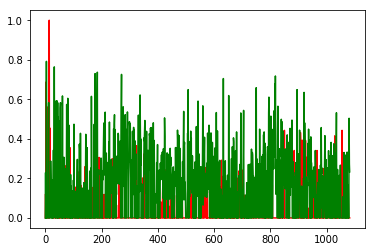

In [58]:
# Visualzation of Positive v/s Negative Score of Tweets
plt.plot(tweets_table["Negative Score"],color="r")
plt.plot(tweets_table["Positive Score"],color="g")
plt.plot(final_df['Compound Score'], color="blue")

#Size of the figure
plt.rcParams["figure.figsize"] = [16,7]


plt.title("Compound v/s Positive v/s Negative Score (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Range")
plt.xlabel("Number of Tweets")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

# Bold the line starting at 0
plt.axhline(y=0, color = 'black')

In [ ]:
# Compound Score Scaled to Millions to Compare Volume for plotting the data.

plt.plot(final_df["Compound Score"]*10000000,color="red")
plt.plot(sorted_tsla_df["volume"],color="black")

#Size of the figure
plt.rcParams["figure.figsize"] = [16,7]

plt.title("Volume v/s Compound Score in (Scaled Millions) (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Range")
plt.xlabel("Number of trading days")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

# Bold the line starting at 0
plt.axhline(y=0, color = 'black')

In [ ]:
# Compound Score Scaled to Hundereds to compare Closing Price of TSLA for plotting the data.

plt.plot(final_df["Compound Score"]*100,color="red")
plt.plot(sorted_tsla_df["close"],color="black")

#Size of the figure
plt.rcParams["figure.figsize"] = [16,7]

plt.title("Change in Closing Price (TSLA) v/s Compound Score in (Scaled Hundreds) (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Range")
plt.xlabel("Number of trading days")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

# Bold the line starting at 0
plt.axhline(y=0, color = 'black')


In [ ]:
# Compound Score Scaled to tens just to compare Change Over Time(%) for plotting the data.

plt.plot(tweets_table["Compound Score"]*10,color="red")
plt.plot(final_df["Change Over Time(%)"],color="b")

#Size of the figure
plt.rcParams["figure.figsize"] = [16,12]

plt.title("Change Over Time (TSLA)  v/s Compound Score of Tweets in (Tens) (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Change Over Time(%)")
plt.xlabel("Compound Score in (Tens)")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

# Bold the line starting at 0
plt.axhline(y=0, color = 'black')

In [ ]:
#Tweet Date vs Change Over Time(TSLA)(Visualize Stock Volatility Date wise)

plt.plot(final_df["Tweet_Date"],color="b")

#Size of the figure
plt.rcParams["figure.figsize"] = [16,15]

plt.ylabel("Change Over Time(%)")
plt.xlabel("Tweet Date")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

plt.plot(final_df["Change Over Time(%)"],color="r")

#Size of the figure
plt.rcParams["figure.figsize"] = [16,15]
plt.title("Tweet Date v/s Change Over Time (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Change Over Time(%)                           Date Range")
plt.xlabel("Number of Trading Days")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

# Bold the line starting at 0
plt.axhline(y=0, color = 'black')

In [ ]:
#No of Retweets compared to Compound score(Inverse Relationship)

plt.plot(final_df["Retweet"], "bo", linestyle="-", markersize=7, linewidth=1)
plt.plot(final_df["Compound Score"]*10000, "rs", linestyle="-", markersize=7, linewidth=1)

plt.title("Retweets v/s Compound Score  (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Range (Scaled Thousands)")
plt.xlabel("Number of trading days")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

# Bold the line starting at 0
plt.axhline(y=0, color = 'black')

#Size of the figure
plt.rcParams["figure.figsize"] = [16,12]
